<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%203-%20Image%20Classification%20on%20prebuilt%20MNIST/mnist_study_5_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement CNN on mnist dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,GRU,Dense

In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images,test_images=train_images/255.0,test_images/255.0

In [ ]:
model=Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.fit(train_images[...,np.newaxis],train_labels,epochs=1)



1875/1875 [==============================] - 31s 15ms/step - loss: 0.1413 - accuracy: 0.9565


In [ ]:
loss,accuracy=model.evaluate(test_images,test_labels)
print(f'accuracy:{accuracy}')
print(f'loss:{loss}')

313/313 [==============================] - 3s 7ms/step - loss: 0.0562 - accuracy: 0.9814
accuracy:0.9814000129699707
loss:0.05620864778757095


1/1 [==============================] - 0s 23ms/step


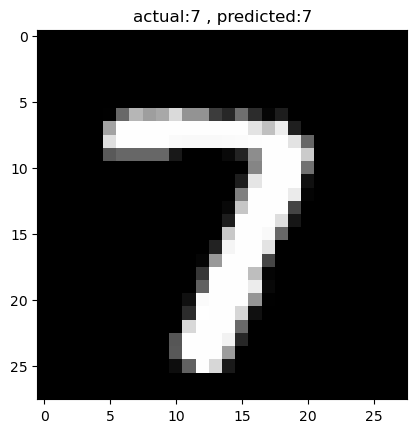

1/1 [==============================] - 0s 22ms/step


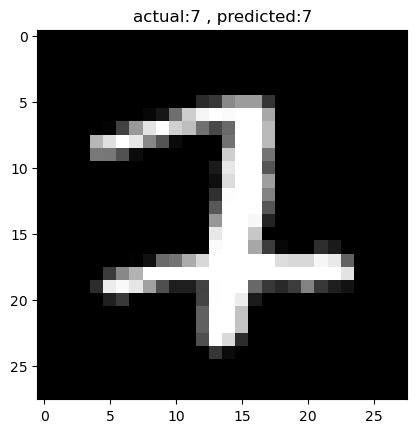

1/1 [==============================] - 0s 21ms/step


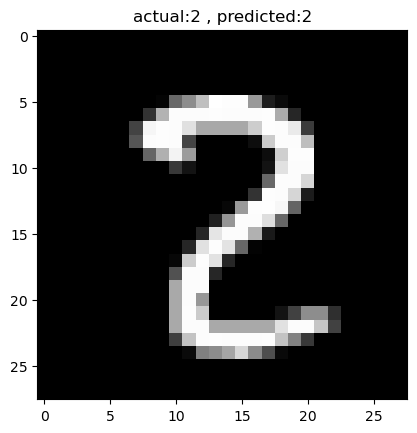

In [ ]:
for _ in range(3):
    index=np.random.randint(0,len(test_images))
    actual_label=test_labels[index]
    predicted_label=np.argmax(model.predict(test_images[index][np.newaxis,...,np.newaxis]))
    plt.figure()
    plt.title(f'actual:{actual_label} , predicted:{predicted_label}')
    plt.imshow(test_images[index],cmap='gray')
    plt.show()